In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')
data.drop('customerID', axis=1, inplace = True)# removing CustomerID from dataset
data_2 = data.copy()

#Initial EDA

In [174]:
# Clean the column by replacing empty strings with NaN
data['TotalCharges'] = data['TotalCharges'].replace(' ', pd.NA)

# Convert the column to float, ignoring NaN values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [176]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [177]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [178]:
data.isnull().sum() # getting the number of missing values in each columns

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [179]:
((data.isnull().sum())/len(data))*100 # getting the percentage of missing values in each  columns

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Multiple imputation for the totalcharges column

In [180]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])


In [181]:
data.describe(include = 'all') # getting an indepth statistical description of the data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [182]:
data.dtypes # understanding the datatypes of each column

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#Feature Extraction

Splitting numerical and categorical varibales

In [183]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [184]:
Numerical_var = data[numerical_columns]
Categorical_var = data[categorical_columns]

In [185]:
Categorical_var

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


Encoding categorical data

In [186]:
columns_to_encode = Categorical_var.loc[:, 'gender':'Churn']
Categorical_var[columns_to_encode.columns] = columns_to_encode.apply(lambda x:pd.factorize(x)[0])
final_categorical = pd.DataFrame(Categorical_var[columns_to_encode.columns])

<ipython-input-186-b2c940de945a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical_var[columns_to_encode.columns] = columns_to_encode.apply(lambda x:pd.factorize(x)[0])


In [187]:
final_categorical

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0
7039,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0
7040,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
7041,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1


Joining back the preprocessed categorical and numerical variables

In [188]:
clean_data = pd.concat([Numerical_var,final_categorical], axis=1)
clean_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,0,2,53.85,108.15,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,0,45,42.30,1840.75,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,2,70.70,151.65,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0
7039,0,72,103.20,7362.90,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0
7040,0,11,29.60,346.45,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1


In [189]:
y = clean_data['Churn']
clean_data.drop('Churn', axis=1, inplace = True)

In [190]:
#Using RandomForestClassifier
random = RandomForestClassifier()
random.fit(clean_data, y)  # Train the model

# Access feature importances
feature_importances = random.feature_importances_

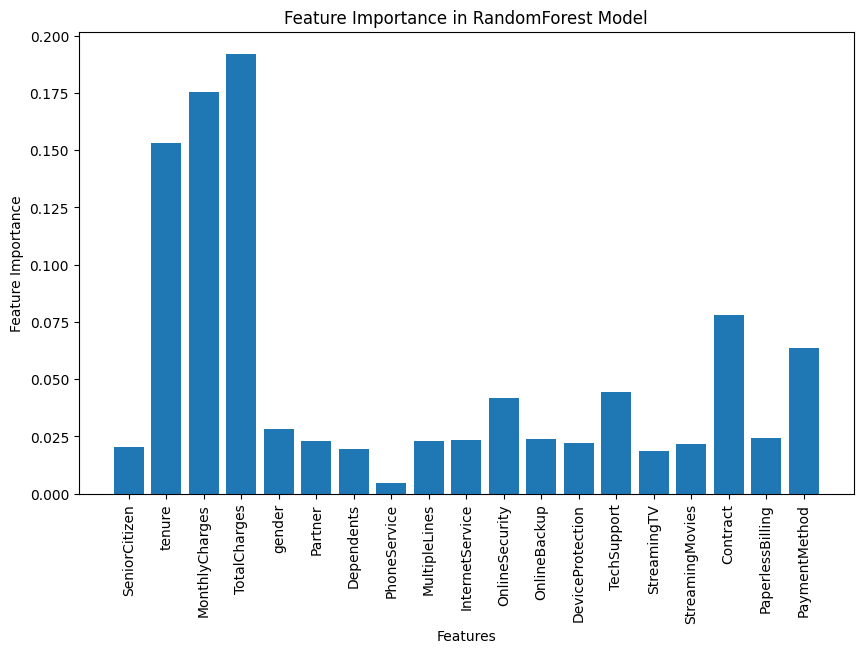

In [191]:
#Visualizing the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=clean_data.columns)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in RandomForest Model')
plt.xticks(rotation='vertical')
plt.show()

In [192]:
#Ranking the features based on the results above
feature_names = clean_data.columns

# Sort feature importance in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking based on Random Forest Classifier:")
for f in range(len(feature_names)):
    print(f"{f + 1}. {feature_names[indices[f]]}: {feature_importances[indices[f]]}")

Feature ranking based on Random Forest Classifier:
1. TotalCharges: 0.19210750203306665
2. MonthlyCharges: 0.1751831981140183
3. tenure: 0.15305136903385883
4. Contract: 0.07780052979283639
5. PaymentMethod: 0.06352757967612369
6. TechSupport: 0.0445557110842244
7. OnlineSecurity: 0.04175223724899158
8. gender: 0.028001256310591426
9. PaperlessBilling: 0.0243842553316074
10. OnlineBackup: 0.02397601531838591
11. InternetService: 0.023313190566597006
12. MultipleLines: 0.023138266648920047
13. Partner: 0.02276087315297352
14. DeviceProtection: 0.021927490717016707
15. StreamingMovies: 0.02150174042009456
16. SeniorCitizen: 0.020522834361496503
17. Dependents: 0.019363651420379543
18. StreamingTV: 0.018522525627380465
19. PhoneService: 0.00460977314143718


In [193]:
# Create a DataFrame with feature importances and corresponding column names
importance_df = pd.DataFrame({'Feature': clean_data.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 35 feature names
top_15_feature_names = importance_df['Feature'].head(15).tolist()

# Select the columns from clean_data that match the top feature names
feature_subset = clean_data[top_15_feature_names]

# Display the resulting DataFrame with the selected columns
feature_subset

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,TechSupport,OnlineSecurity,gender,PaperlessBilling,OnlineBackup,InternetService,MultipleLines,Partner,DeviceProtection,StreamingMovies
0,29.85,29.85,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1889.50,56.95,34,1,1,0,1,1,1,1,0,1,1,1,0
2,108.15,53.85,2,0,1,0,1,1,0,0,0,1,1,0,0
3,1840.75,42.30,45,1,2,1,1,1,1,1,0,0,1,1,0
4,151.65,70.70,2,0,0,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,1,1,1,1,1,0,1,0,2,0,1,1
7039,7362.90,103.20,72,1,3,0,0,0,0,0,1,2,0,1,1
7040,346.45,29.60,11,0,0,0,1,0,0,1,0,0,0,0,0
7041,306.60,74.40,4,0,1,0,0,1,0,1,1,2,0,0,0


In [194]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Perform feature selection to determine the best features (e.g., using SelectKBest with f_regression)
k_best = SelectKBest(score_func=f_regression, k=10)
best_features = k_best.fit_transform(feature_subset, y)

# Get the column names of the best features
best_feature_indices = k_best.get_support(indices=True)
best_feature_names = feature_subset.columns[best_feature_indices]

# Initialize PCA without specifying the number of components
pca = PCA()

# Fit the PCA model to your data
pca.fit(best_features)

# Get the explained variance of each principal component
explained_variance = pca.explained_variance_ratio_

# Sort the feature names based on the explained variance (highest variance first)
sorted_feature_names = [name for _, name in sorted(zip(explained_variance, best_feature_names), reverse=True)]

# Select the top N feature names
top_n = 7
selected_feature_names = sorted_feature_names[:top_n]
newX = feature_subset[selected_feature_names]
newX

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,TechSupport,OnlineSecurity
0,29.85,29.85,1,0,0,0,0
1,1889.50,56.95,34,1,1,0,1
2,108.15,53.85,2,0,1,0,1
3,1840.75,42.30,45,1,2,1,1
4,151.65,70.70,2,0,0,0,0
...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,1,1,1,1
7039,7362.90,103.20,72,1,3,0,0
7040,346.45,29.60,11,0,0,0,1
7041,306.60,74.40,4,0,1,0,0


In [195]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance.sum() * 100:.2f}%")

Explained Variance: 100.00%


### Standardising the independent variables and inputting the proper column names and formats

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [197]:
scaled_features=scaler.fit_transform(newX)

In [198]:
scaled_df = pd.DataFrame(scaled_features, columns=newX.columns)
X= scaled_df

In [199]:
X

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,TechSupport,OnlineSecurity
0,-0.994971,-1.160323,-1.277445,-0.828207,-1.145198,-0.909172,-0.903589
1,-0.173876,-0.259629,0.066327,0.371271,-0.274744,-0.909172,0.351386
2,-0.960399,-0.362660,-1.236724,-0.828207,-0.274744,-0.909172,0.351386
3,-0.195400,-0.746535,0.514251,0.371271,0.595711,0.347362,0.351386
4,-0.941193,0.197365,-1.236724,-0.828207,-1.145198,-0.909172,-0.903589
...,...,...,...,...,...,...,...
7038,-0.129281,0.665992,-0.340876,0.371271,-0.274744,0.347362,0.351386
7039,2.242808,1.277533,1.613701,0.371271,1.466165,-0.909172,-0.903589
7040,-0.855182,-1.168632,-0.870241,-0.828207,-1.145198,-0.909172,0.351386
7041,-0.872777,0.320338,-1.155283,-0.828207,-0.274744,-0.909172,-0.903589


#Exploratory Data Analysis(EDA)

In [200]:
data2= data[['TotalCharges', 	'MonthlyCharges', 	'tenure', 	'Contract', 	'PaymentMethod', 	'OnlineSecurity', 	'TechSupport', 'Churn']]

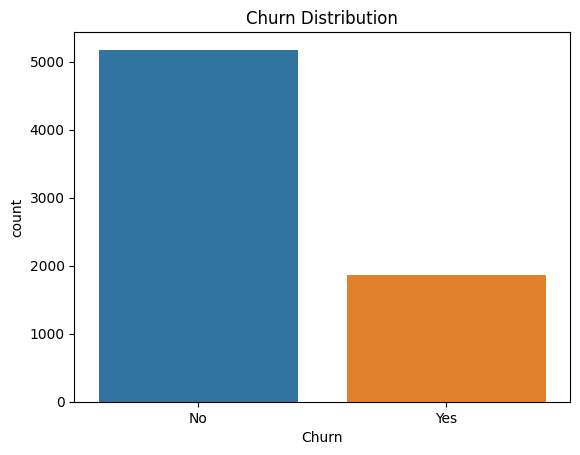

In [201]:
# Visualize the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=data2)
plt.title('Churn Distribution')
plt.show()

Output: About 28% of customer eventually churn over a given amount of time after using the proucts.

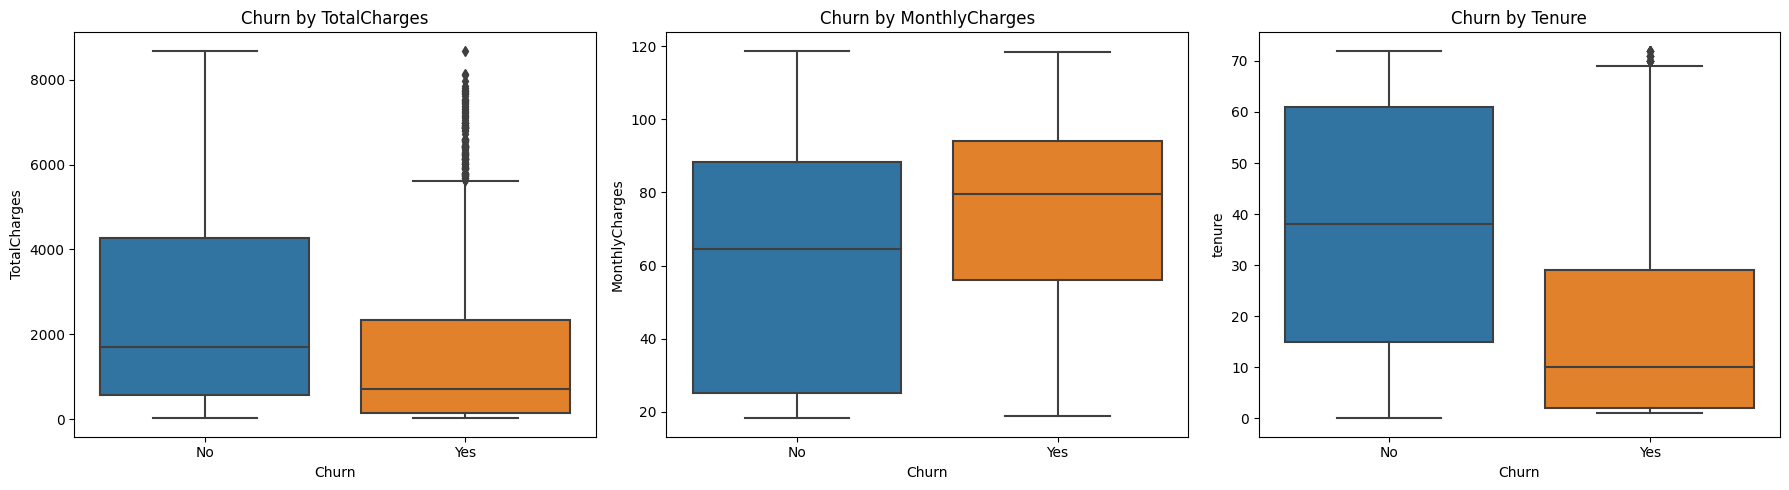

In [202]:

# Explore numerical variables against churn
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.boxplot(x='Churn', y='TotalCharges', data=data2, ax=axes[0])
axes[0].set_title('Churn by TotalCharges')

sns.boxplot(x='Churn', y='MonthlyCharges', data=data2, ax=axes[1])
axes[1].set_title('Churn by MonthlyCharges')

sns.boxplot(x='Churn', y='tenure', data=data2, ax=axes[2])
axes[2].set_title('Churn by Tenure')

plt.tight_layout()
plt.show()

Output= Based on the numerical data = an individual with a total charge of about 1000, Monthly charge of about 80 and a tenuure time of 10 years or less is likely to churn.

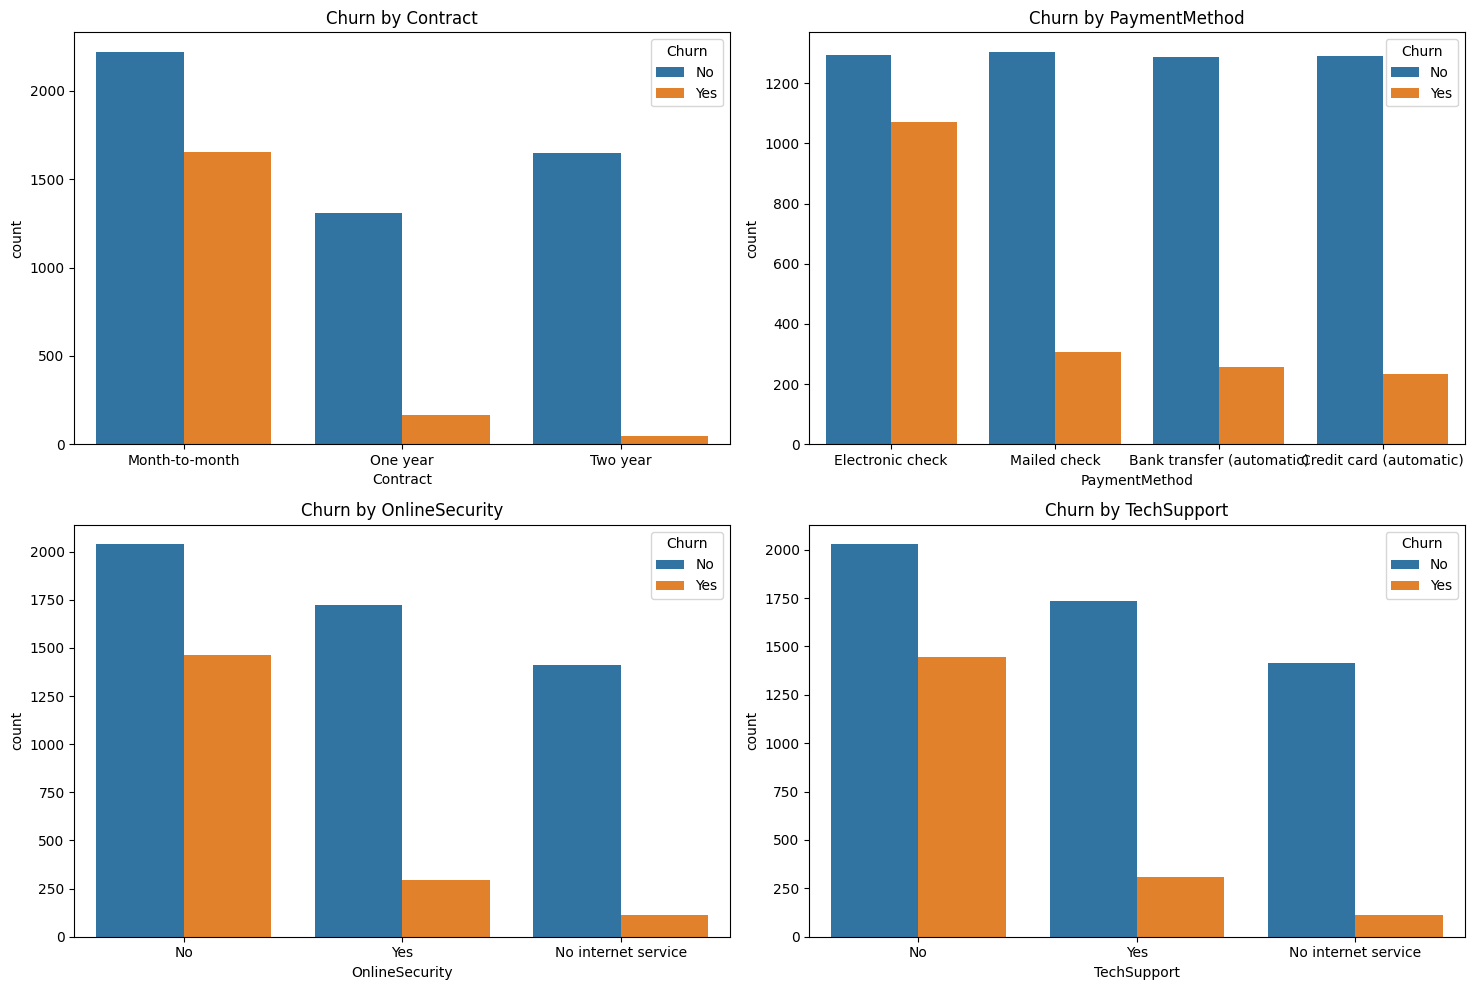

In [203]:
# Explore categorical variables against churn
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.countplot(x='Contract', hue='Churn', data=data2, ax=axes[0, 0])
axes[0, 0].set_title('Churn by Contract')

sns.countplot(x='PaymentMethod', hue='Churn', data=data2, ax=axes[0, 1])
axes[0, 1].set_title('Churn by PaymentMethod')

sns.countplot(x='OnlineSecurity', hue='Churn', data=data2, ax=axes[1, 0])
axes[1, 0].set_title('Churn by OnlineSecurity')

sns.countplot(x='TechSupport', hue='Churn', data=data2, ax=axes[1, 1])
axes[1, 1].set_title('Churn by TechSupport')

plt.tight_layout()
plt.show()

Output: Based on the categorical data. Below is th eprofiel of a customer likely to churn:
An individual with a Month-to-Month contract, using a electronic check as payment method, who is neither using online security tools nor tech support.

<Figure size 1300x1700 with 0 Axes>

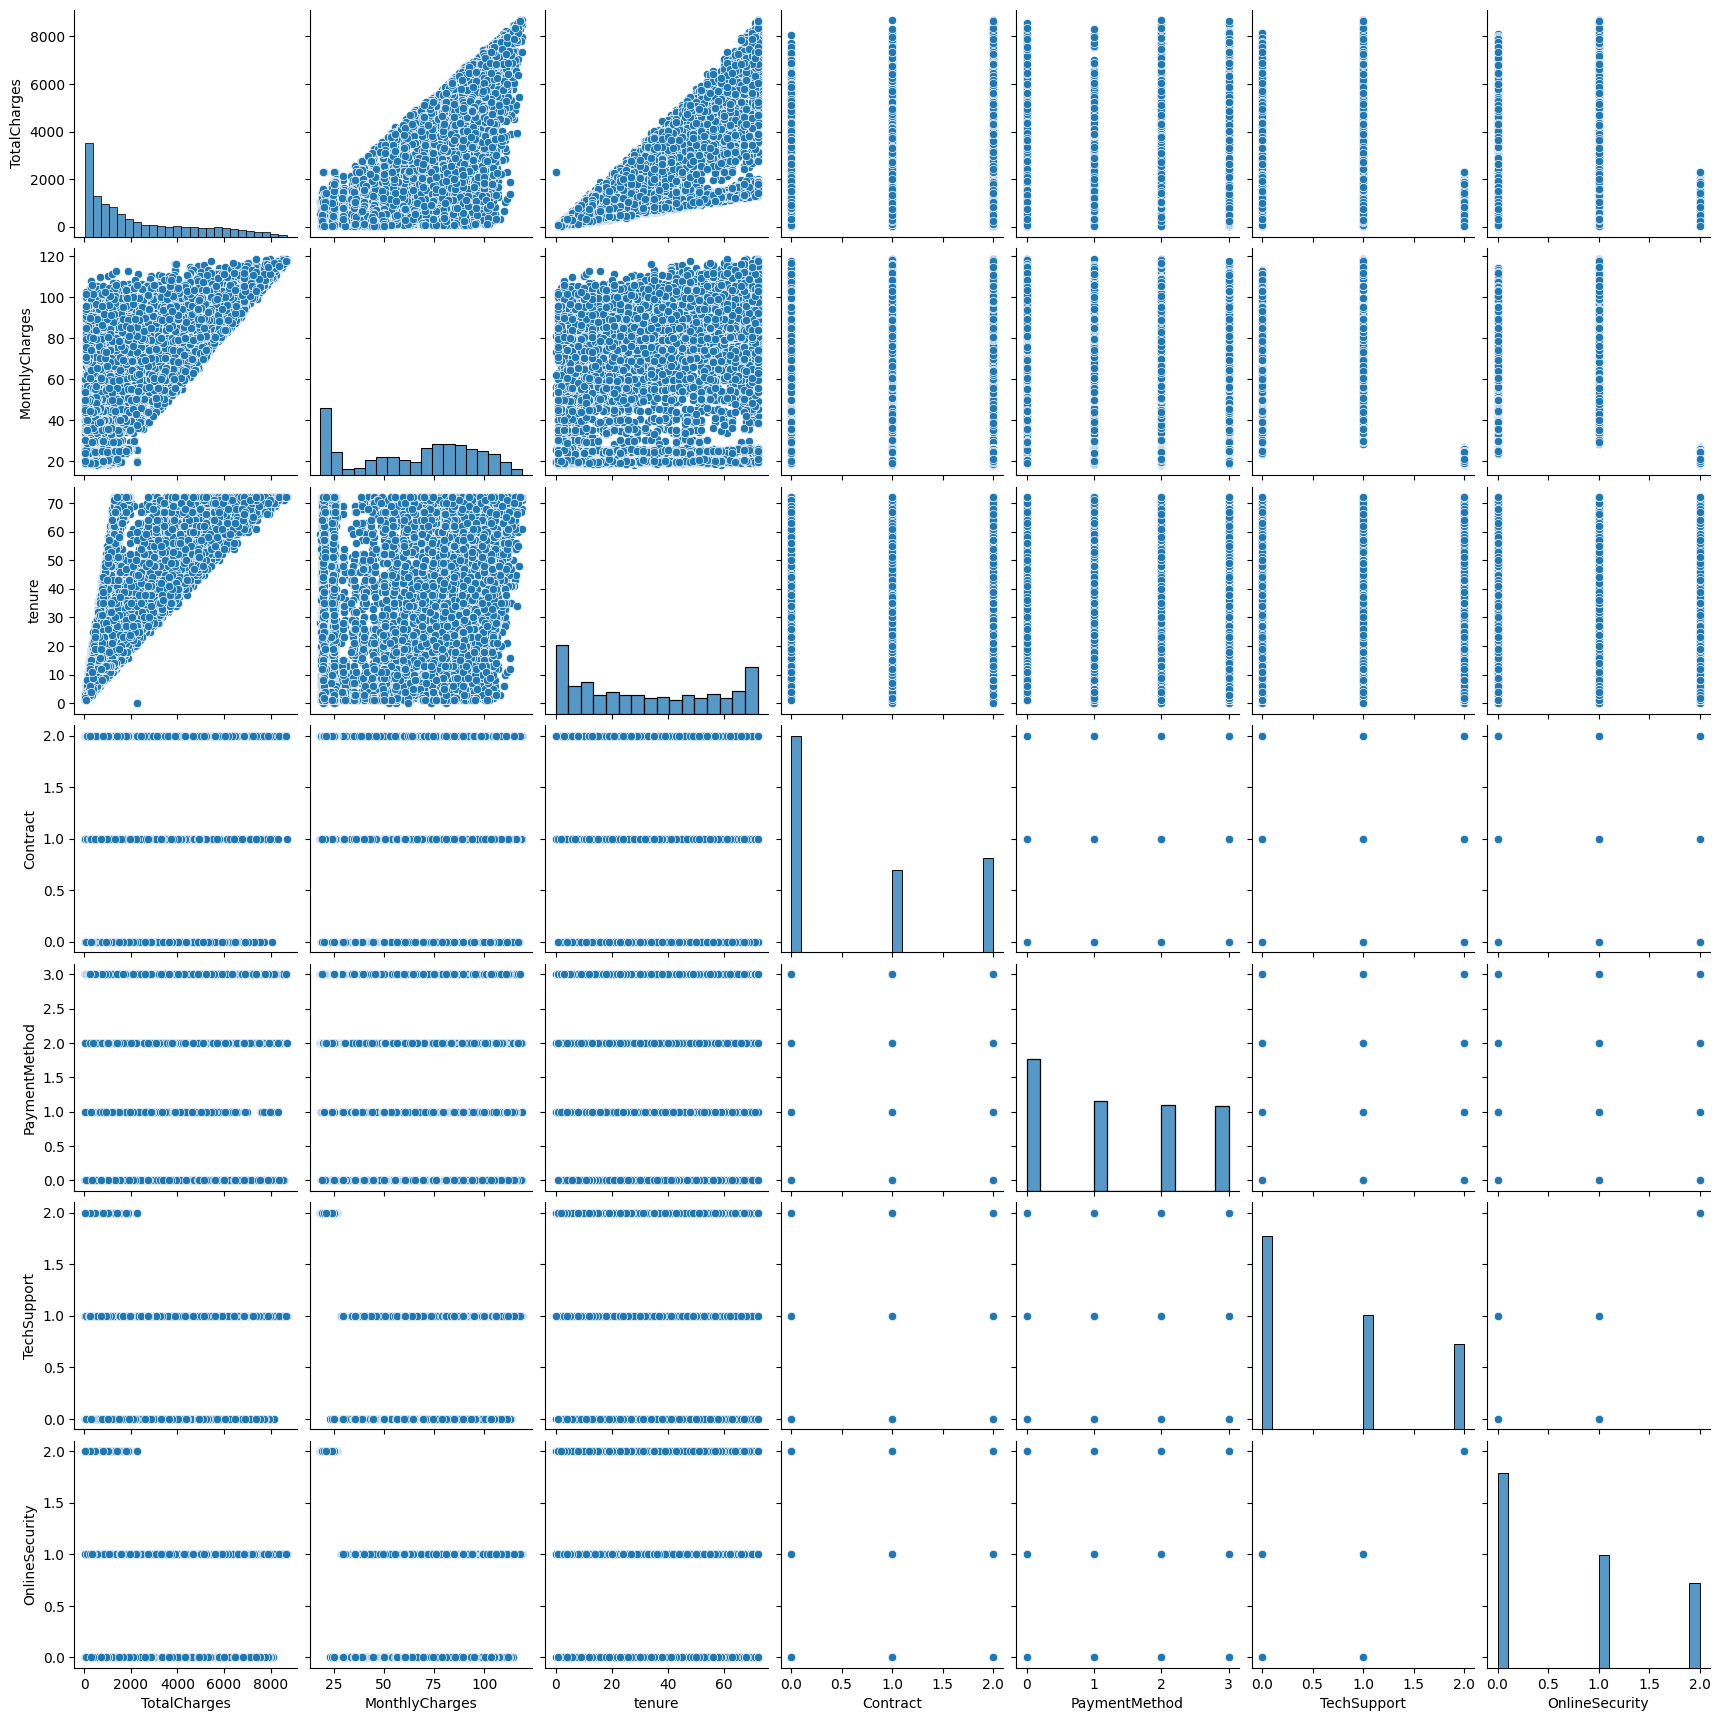

In [204]:
new_data = pd.concat([y,newX], axis=1)
plt.figure(figsize=(13,17))
sns.pairplot(data=new_data.drop(['Churn'],axis=1))
plt.show()

Insights:
- The variable Total charge has a positive correlation with Monthly Charge and tenure.Thus, As Monthly charge and/or ternure increase, total charge increases leading to a reducing chruning possibility.
- There is also a positive correlation between TechSupport and OnlineSecurity. Thus, as customers request for technical support, there is a high probability they will subscribe to online security tools.

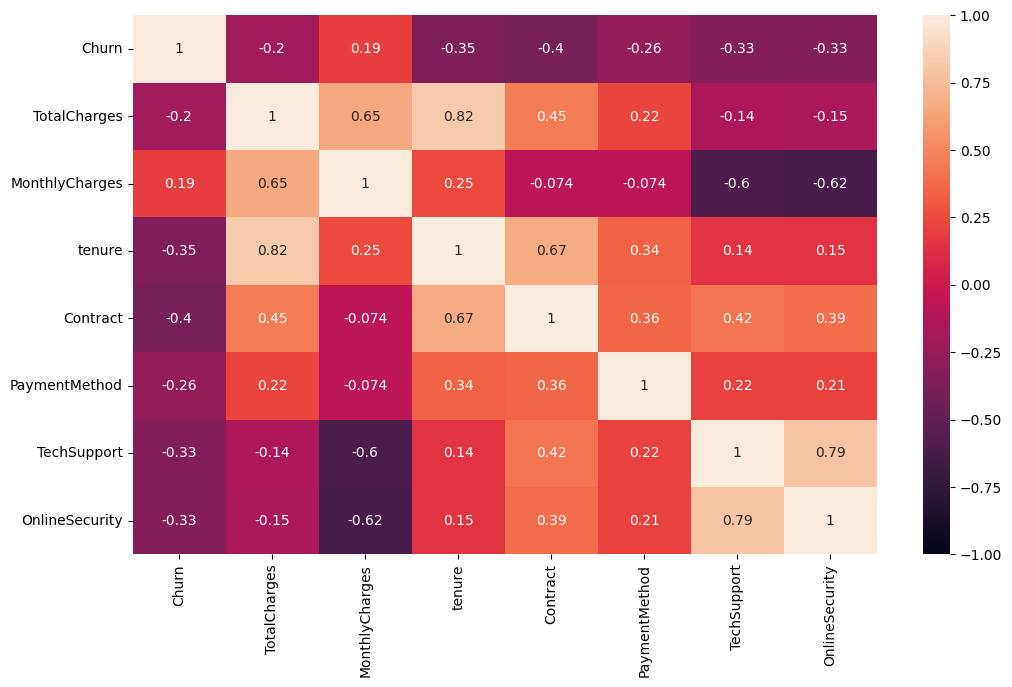

In [205]:
plt.figure(figsize=(12, 7))
sns.heatmap((new_data).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Output:
- Strong positive correlation between online security and TechSupport (0.79):
        
Explanation: This suggests that as the level of online security increases, the level of TechSupport also tends to increase. If one invests more in online security measures, there's a strong tendency to also invest more in TechSupport.
- Mild positive correlation between Total charge and Monthly charge (0.65):

Explanation: This implies that as the total charges for a service increase, the monthly charges also tend to increase, but the relationship is not as strong as a perfect positive correlation. Changes in total charges are moderately associated with changes in monthly charges.
- Strong positive correlation between Total charge and tenure (0.83):

Explanation: This indicates that as the tenure of a customer (how long they have been using the service) increases, the total charges also tend to increase significantly. Longer-term customers tend to accumulate higher total charges.
- Mild positive correlation between tenure and contract (0.67):

Explanation: As the tenure of a customer increases, there's a mild tendency for the type of contract (perhaps, longer-term contracts) to also increase. However, the relationship is not as strong as in the previous example.

- Mild negative correlation between Monthly Charges with TechSupport (0.6) and OnlineSecurity (0.62):


Explanation: Here, as monthly charges increase, there's a mild tendency for TechSupport and OnlineSecurity to decrease. This suggests that customers who pay higher monthly charges are less likely to invest in additional services like TechSupport and OnlineSecurity.

##Profile of customer related to churning

Sample Customer Churn Profile:
**Note: Name, Age, occupation, location and Gender are not relevant for churning. They were added to personify someone who has the high probability of churning**

Name: Alex Johnson

Age: 42

Occupation: Sales Representative

Location: Suburban area, West

Gender: Male

Usage Characteristics of customer likely to churn:

  - Monthly Charge: $85

  - Total Charge: $950
  - Tenure: 7 years
  - Contract Type: Month-to-Month
  - Payment Method: Electronic Check

Service Usage:

  - Online Security: Not Subscribed
  - Tech Support: Not Subscribed

Behavioral Patterns:

  - Over the past 7 years, Alex's total charges have seen a noticeable increase, possibly indicating a growing reliance on the service.
  - Preferring the flexibility of a Month-to-Month contract, Alex values the freedom to adapt their plan as needed.
  - The use of electronic check payments suggests a preference for convenient and automated transactions.
  - While there is a positive correlation between total charge and tenure, Alex's tenure falls short of the 10-year mark associated with a higher probability of churning.
  - The absence of subscriptions to online security and tech support aligns with the categorical data indicating a propensity to churn for customers with this profile.

Correlation Analysis:

  A mild negative correlation between Alex's monthly charges and the likelihood to invest in additional services like Tech Support and Online Security is observed. As monthly charges increase, the probability of subscribing to these services tends to decrease, in line with the general trend identified in the dataset.

Prediction:
Considering Alex's usage characteristics and the identified correlations, there is a moderate likelihood of churn. The Month-to-Month contract, electronic check payment method, and the absence of online security and tech support subscriptions contribute to this prediction. Implementing retention strategies, such as promoting longer-term contracts or personalized offers on additional services, may be effective in retaining Alex as a customer.

#Training

In [206]:
!pip install scikeras

In [207]:
from scikeras.wrappers import KerasClassifier
#from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training MLP model using functional API

In [209]:
# define a funuction to create the MLP model
def mlp_model(hidden_units=64, optimizers = 'adam'):
  input_layer = Input(shape=(X_train.shape[1],))
  hidden_layer1 = Dense(hidden_units, activation = 'relu')(input_layer)
  hidden_layer2 = Dense(hidden_units // 2, activation = 'tanh')(hidden_layer1)
  hidden_layer3 = Dense(hidden_units // 4, activation = 'elu')(hidden_layer2)
  output_layer = Dense(1, activation = 'sigmoid' )(hidden_layer3)
  model = Model(inputs = input_layer, outputs = output_layer)
  model.compile(optimizer = optimizers, loss ='binary_crossentropy', metrics = ['accuracy'])
  return model

In [210]:
k_model = KerasClassifier(build_fn=mlp_model, epochs= 5, hidden_units = 32, verbose =1)

In [211]:
# Define the hyperparameters and values to search over in the grid search
param_grid = {
    'hidden_units': [8, 16 ,32, 64],
    'batch_size' : [20, 32, 64, 128],
    'epochs':[10,20, 40, 60, 80, 100],
}

In [212]:
# Create a GridSearchCV instance with cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=k_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

In [ ]:
# Perform the grid search on the training data
grid_result = grid.fit(X_train, y_train)

In [214]:
# Get the best parameters and the corresponding accuracy
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_}")

Best Parameters: {'batch_size': 32, 'epochs': 40, 'hidden_units': 16}
Best Accuracy: 0.8013844515441959


In [215]:
# Get the best model
best_model = grid_result.best_estimator_

# Predict probabilities on the test set
y_pred_proba = best_model.predict_proba(X_test)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC Score: {auc_score}")

45/45 [==============================] - 0s 3ms/step
AUC Score: 0.8562423012825158


#Optimising, testing and training

In [216]:
# split the train data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
optimized_model = mlp_model(hidden_units=grid_result.best_params_["hidden_units"], optimizers=grid_result.best_estimator_.optimizer)
history = optimized_model.fit(X_train, y_train, batch_size=grid_result.best_params_["batch_size"], epochs=grid_result.best_params_["epochs"], verbose=2, validation_data=(X_val, y_val))


In [223]:
# Evaluate the data with the test set
test_loss, test_accuracy = optimized_model.evaluate(X_test, y_test)
print("Model Test Accuracy: ", str(test_accuracy))

45/45 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.7999
Model Test Accuracy:  0.799858033657074


In [218]:
epochs = history.epoch
history = history.history

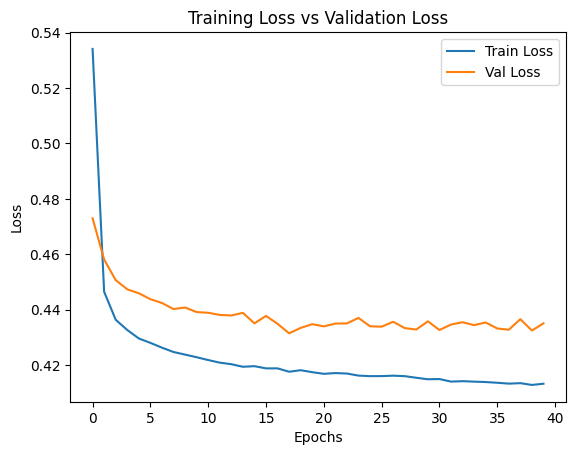

In [219]:
# Visualize the train and test losses
plt.title("Training Loss vs Validation Loss")
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

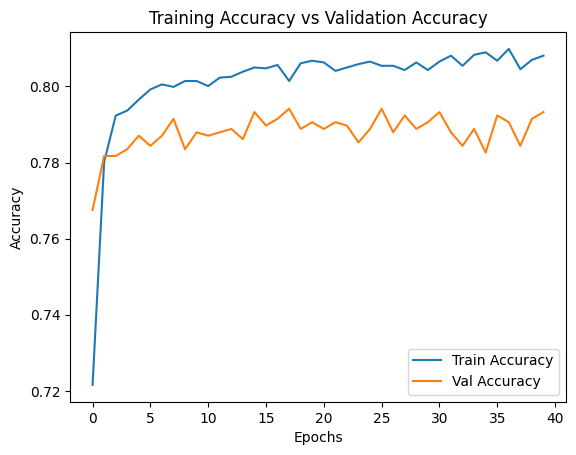

In [220]:
# Visualize Accuracy for train and validation sets
plt.title("Training Accuracy vs Validation Accuracy")
plt.plot(epochs, history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# check auc score
y_pred = optimized_model.predict(X_test)
print(" model auc score:", roc_auc_score(y_test, y_pred))

# Deployment

In [222]:
# Saving the model
optimized_model.save("churn_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
